In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

## Codigo urbanistico (actualizado a 3/12/2020)

* Diccionario de fields en [link](https://data.buenosaires.gob.ar/dataset/codigo-urbanistico/resource/40e01734-0798-426d-9969-b7a6ce1ea693)

`incid_uva` es el valor del terreno en UVAs por metro cuadrado de superficie según ley 6.062 mod. y comp.

In [2]:
# limite sur
zona_sur = gpd.read_file('../data/big_sur.geojson')

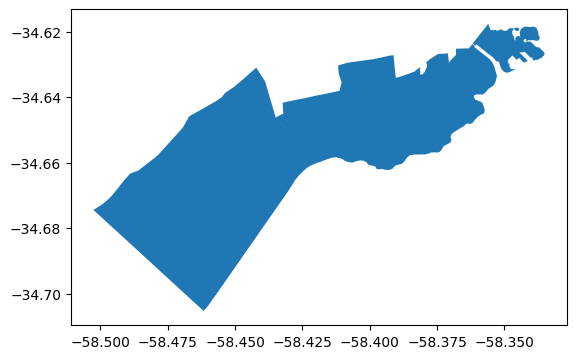

In [3]:
zona_sur.plot();

In [4]:
# codigo urbanistico
cu_root ='https://cdn.buenosaires.gob.ar/datosabiertos/datasets/secretaria-de-desarrollo-urbano/codigo-urbanistico/codigo-urbanistico.geojson'
cu = gpd.read_file(cu_root)

In [5]:
cu_sur = cu.clip(zona_sur)

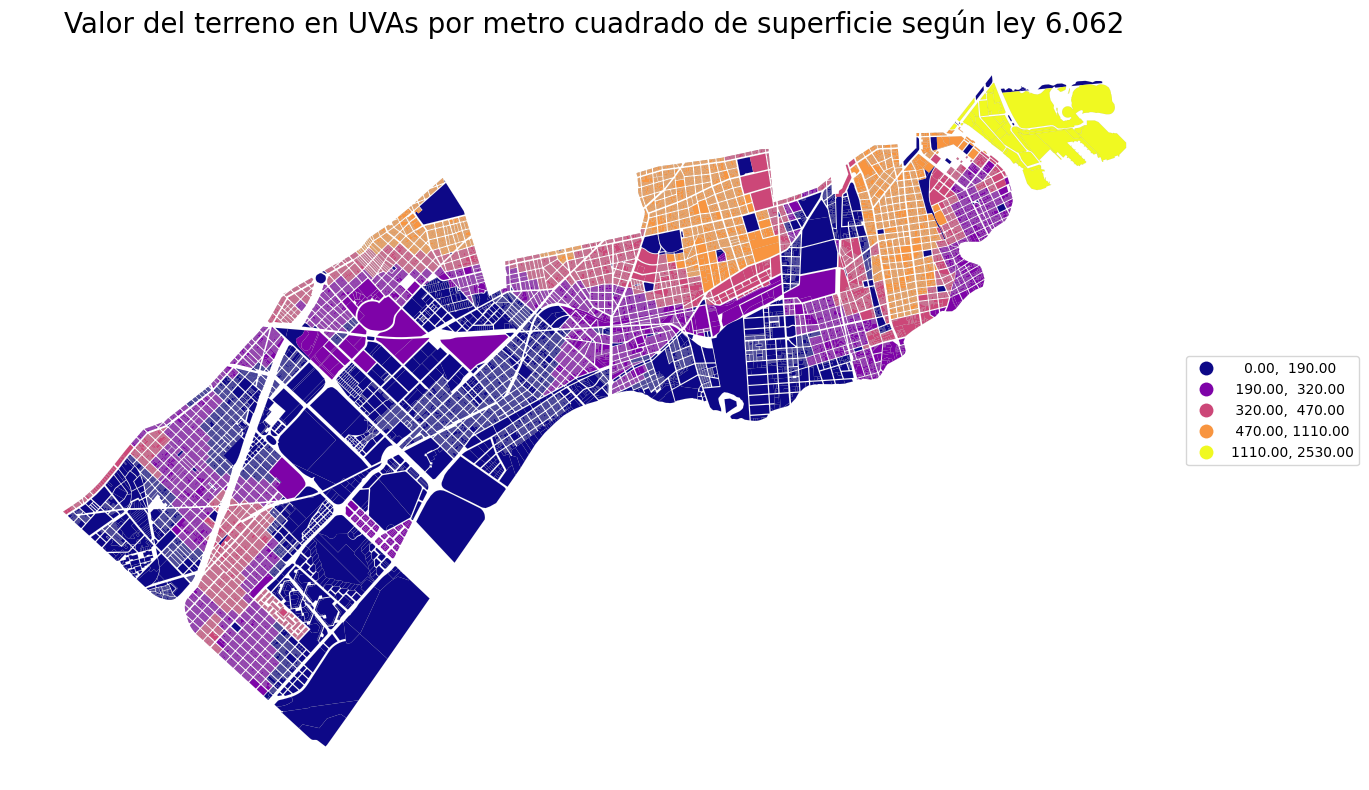

In [6]:
f,ax = plt.subplots(figsize=(14,8))
cu_sur.plot(ax=ax, column='inc_uva_19', k=5, cmap='plasma', 
                  scheme='NaturalBreaks', edgecolor='gray', linewidth=0.05,
                  legend=True, legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})
ax.set_axis_off()
ax.set_title('Valor del terreno en UVAs por metro cuadrado de superficie según ley 6.062',fontsize=20)
plt.tight_layout();

**Conversion uva -> dolar**

* Referencia uva a pesos aca: https://ikiwi.net.ar/calculadoras/uva-a-pesos/

* Referencia dolar: https://www.ambito.com/contenidos/dolar.html

In [7]:
ref_uva = 144.15 # pesos ARG
cambio_dolar = 291
cu_sur['uva19_ARS'] = cu_sur['inc_uva_19'].apply(lambda x: x*ref_uva)
cu_sur['usdm2'] = cu_sur['uva19_ARS'].apply(lambda x: x/cambio_dolar)

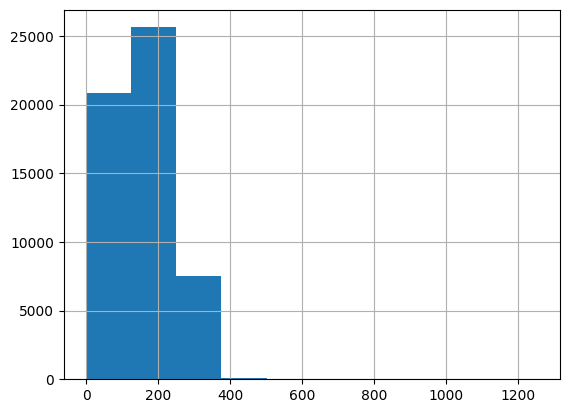

In [8]:
cu_sur['usdm2'].hist();

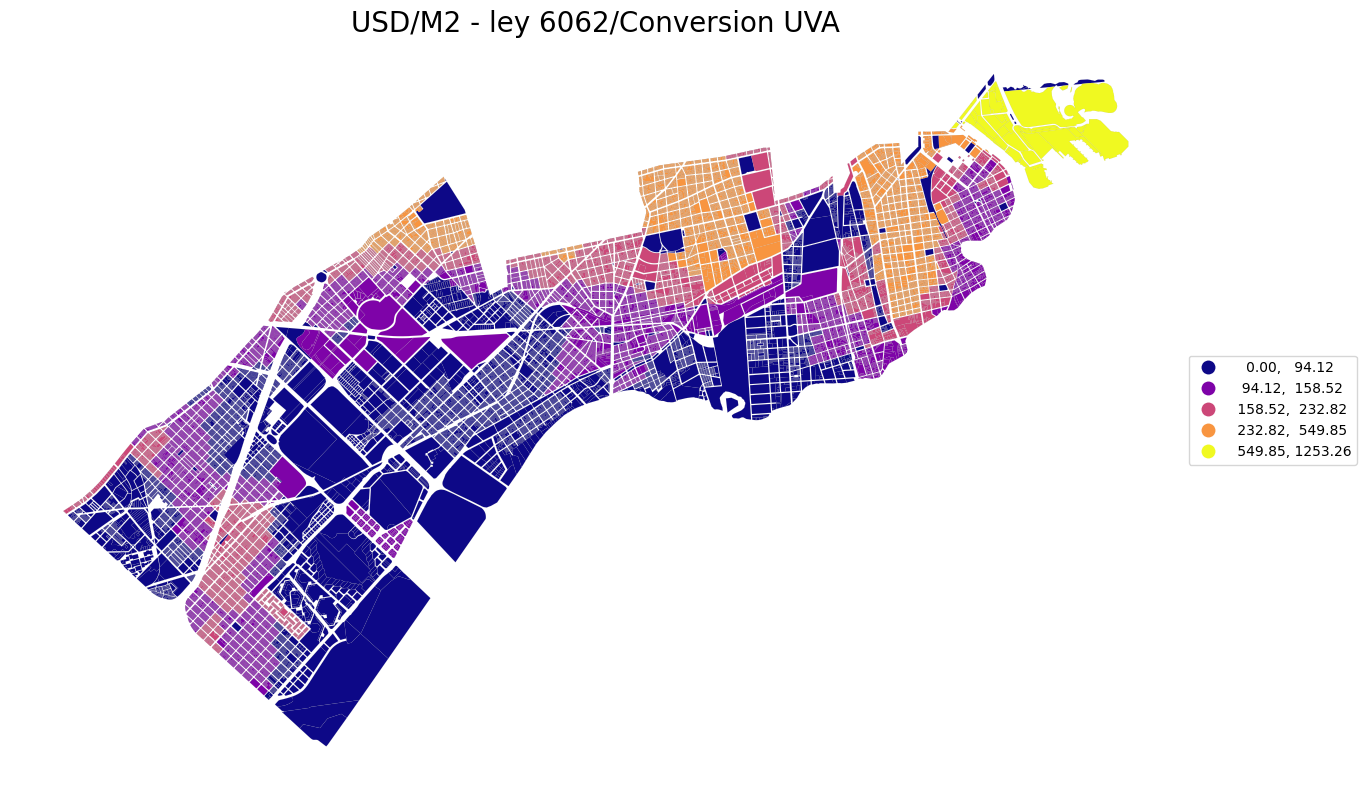

In [9]:
f,ax = plt.subplots(figsize=(14,8))
cu_sur.plot(ax=ax, column='usdm2', k=5, cmap='plasma', 
                  scheme='NaturalBreaks', edgecolor='gray', linewidth=0.05,
                  legend=True, legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})
ax.set_axis_off()
ax.set_title('USD/M2 - ley 6062/Conversion UVA',fontsize=20)
plt.tight_layout();

In [10]:
usdm2 = dict(zip(cu_sur.smp,cu_sur.usdm2))

In [11]:
from REM.datasources import caba_parcelas

In [12]:
parcelas = caba_parcelas(source_idx=1)
parcelas_sur = parcelas.clip(zona_sur)

Leyendo parcelas desde directorio local ...


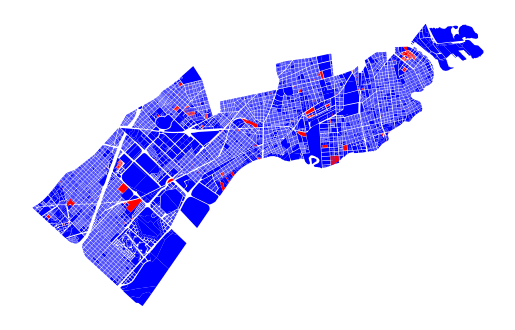

In [13]:
f, ax = plt.subplots()
parcelas_sur[parcelas_sur['smp'].isin(cu['smp'].unique())].plot(ax=ax, color='blue')
parcelas_sur[~parcelas_sur['smp'].isin(cu['smp'].unique())].plot(ax=ax, color='red')
ax.set_axis_off();

In [14]:
# Parcelas perdidas
len(parcelas_sur[~parcelas_sur['smp'].isin(cu['smp'].unique())]['smp'])

491

In [15]:
parcelas_sur['usdm2'] = parcelas_sur['smp'].map(usdm2)

In [16]:
from REM.utils import neighbors_mean

In [17]:
usd_vecinos = neighbors_mean(base_data=parcelas_sur, observation_cols=['usdm2'], n=10)

In [18]:
usd_vecinos

array([  0.        , 856.9742268 , 856.9742268 , ...,  69.35051546,
        69.35051546,  69.35051546])

In [19]:
parcelas_sur['usdm2'] = usd_vecinos

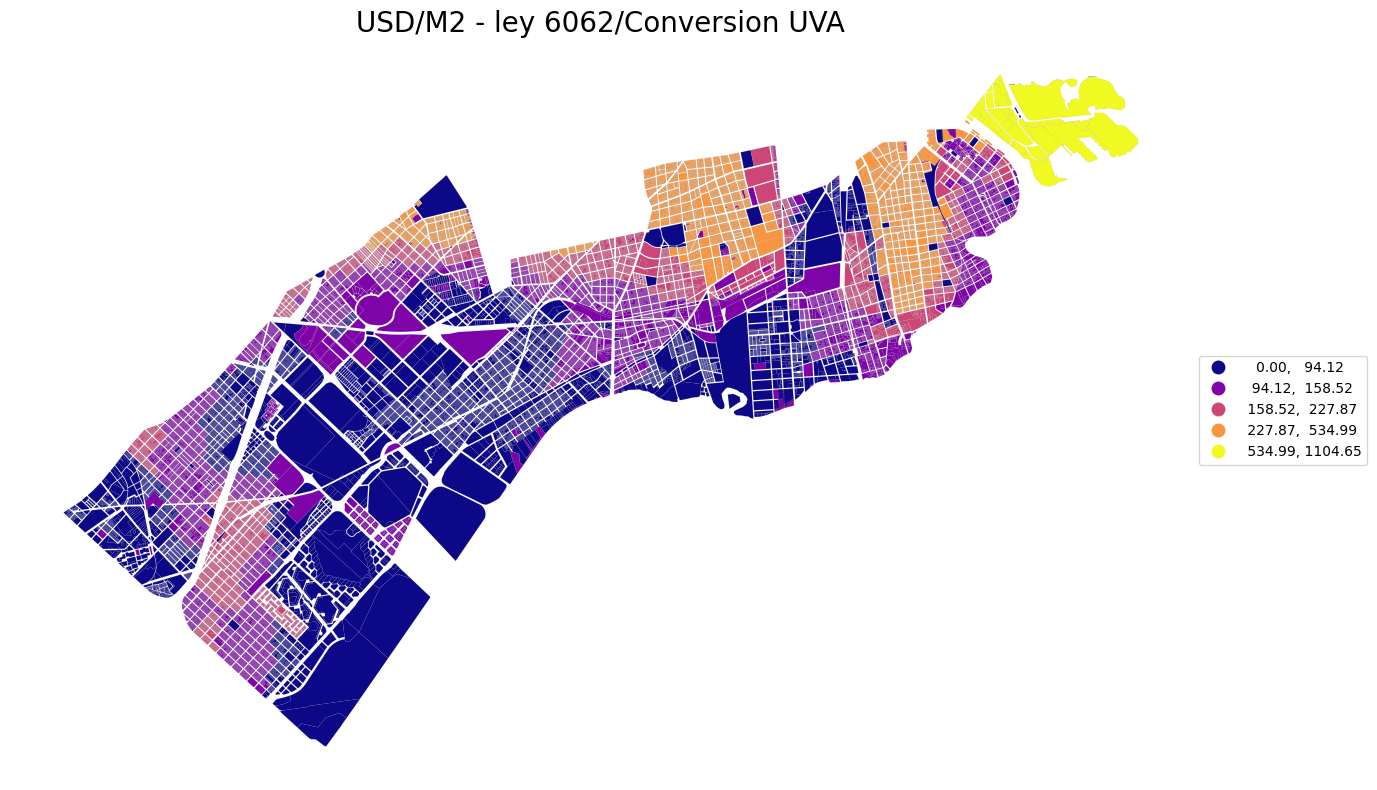

In [20]:
f,ax = plt.subplots(figsize=(14,8))
parcelas_sur.plot(ax=ax, column='usdm2', k=5, cmap='plasma', 
                  scheme='NaturalBreaks', edgecolor='gray', linewidth=0.05,
                  legend=True, legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})
ax.set_axis_off()
ax.set_title('USD/M2 - ley 6062/Conversion UVA',fontsize=20)
plt.tight_layout();

In [22]:
#parcelas_sur[['smp','usdm2','geometry']].to_file('../data/parcelas_usdm2_cu.geojson', driver="GeoJSON")
#parcelas_sur[['smp','usdm2']].to_csv('../data/parcelas_usdm2_cu.csv')